In [21]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.3                         
year           2020                        
month          10                          
day            10                          
svn rev        79318                       
language       R                           
version.string R version 4.0.3 (2020-10-10)
nickname       Bunny-Wunnies Freak Out     

In [22]:
LungCapData <- read.table('./sample_data/LungCapData.txt', header=T, sep="\t")
attach(LungCapData)
names(LungCapData)

The following objects are masked from LungCapData (pos = 3):

    Age, Caesarean, Gender, Height, LungCap, Smoke


The following objects are masked from LungCapData (pos = 4):

    Age, Caesarean, Gender, Height, LungCap, Smoke




[1] "LungCap"   "Age"       "Height"    "Smoke"     "Gender"    "Caesarean"

In [23]:
head(LungCapData)

,LungCap,Age,Height,Smoke,Gender,Caesarean
,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
1,6.475,6,62.1,no,male,no
2,10.125,18,74.7,yes,female,no
3,9.550,16,69.7,no,female,yes
4,11.125,14,71.0,no,male,no
5,4.800,5,56.9,no,male,no
6,6.225,11,58.7,no,female,no


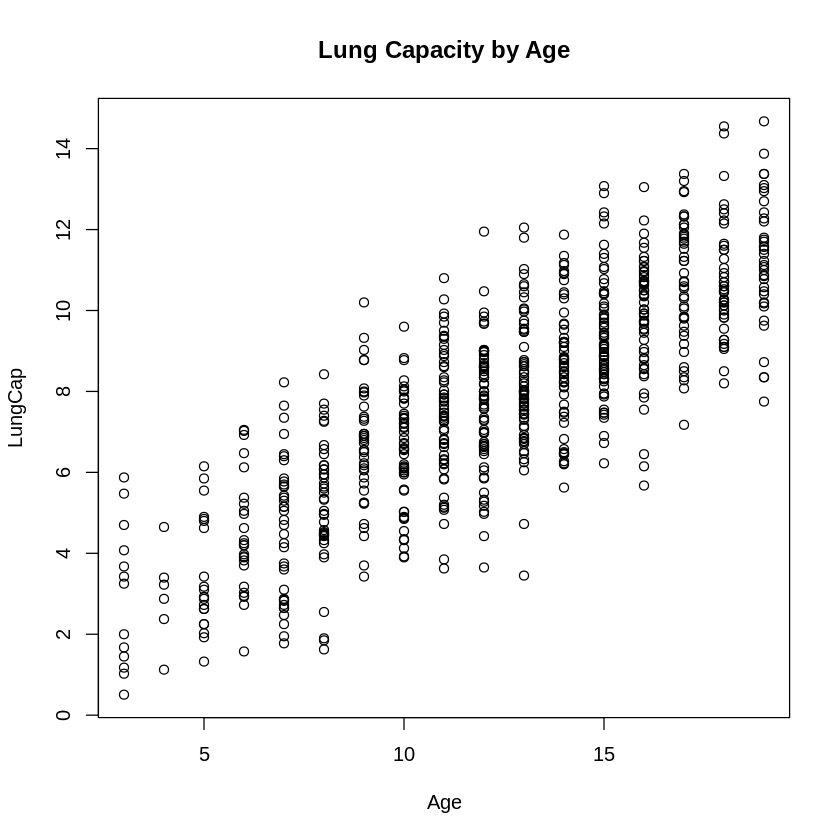

In [24]:
plot(Age, LungCap, main="Lung Capacity by Age")

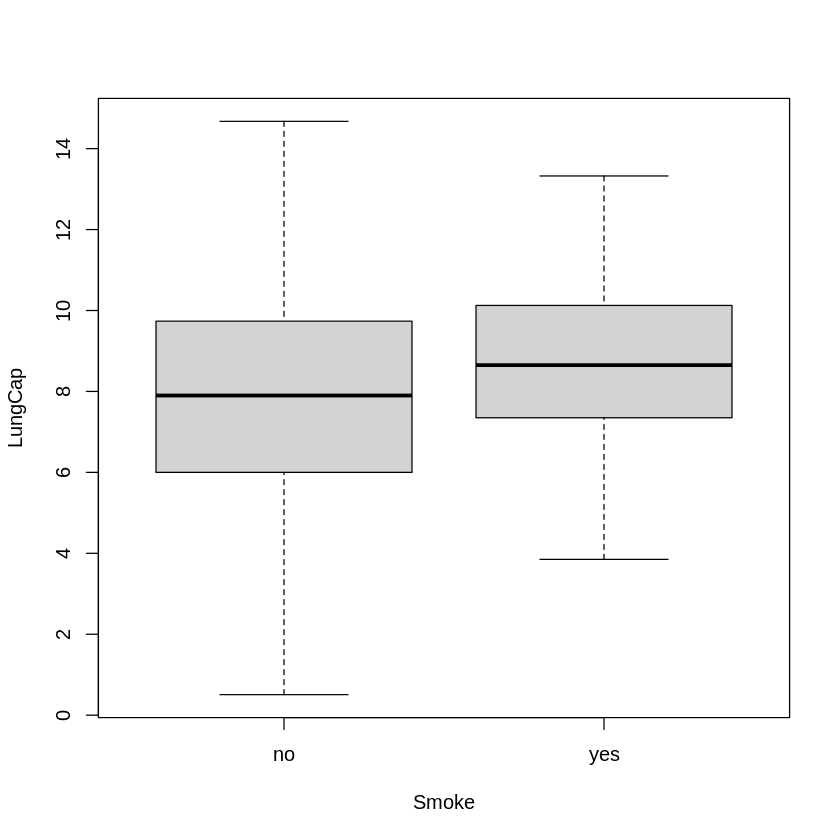

In [25]:
boxplot(LungCap~Smoke)

In [28]:
# H0: Median Lung Capacity of smokers = that of non smokers
# two-sided test
wilcox.test(LungCap~Smoke, mu=0, alt="two.sided", conf.int=T, conf.level=0.95, paired=F, exact=T, correct=T)

Warning message in wilcox.test.default(x = c(6.475, 9.55, 11.125, 4.8, 6.225, 4.95, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = c(6.475, 9.55, 11.125, 4.8, 6.225, 4.95, :
“cannot compute exact confidence intervals with ties”



	Wilcoxon rank sum test with continuity correction

data:  LungCap by Smoke
W = 20128, p-value = 0.005538
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -1.3999731 -0.2499419
sample estimates:
difference in location 
            -0.8000564 


## Wilcoxon Signed-Rank Test

Two data samples are matched if they come from repeated observations of the same subject. Using the Wilcoxon Signed-Rank Test, we can decide whether the corresponding data population distributions are identical without assuming them to follow the normal distribution.

**Example**

In the built-in data set named immer, the barley yield in years 1931 and 1932 of the same field are recorded. The yield data are presented in the data frame columns Y1 and Y2.

In [29]:
library(MASS)
head(immer)

,Loc,Var,Y1,Y2
,<fct>,<fct>,<dbl>,<dbl>
1,UF,M,81.0,80.7
2,UF,S,105.4,82.3
3,UF,V,119.7,80.4
4,UF,T,109.7,87.2
5,UF,P,98.3,84.2
6,W,M,146.6,100.4


**Problem**

Without assuming the data to have normal distribution, test at .05 significance level if the barley yields of 1931 and 1932 in data set immer have identical data distributions.

**Solution**

The null hypothesis is that the barley yields of the two sample years are identical populations. To test the hypothesis, we apply the wilcox.test function to compare the matched samples. For the paired test, we set the "paired" argument as TRUE. As the p-value turns out to be 0.005318, and is less than the .05 significance level, we reject the null hypothesis.

In [30]:
wilcox.test(immer$Y1, immer$Y2, paired=TRUE) 

Warning message in wilcox.test.default(immer$Y1, immer$Y2, paired = TRUE):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  immer$Y1 and immer$Y2
V = 368.5, p-value = 0.005318
alternative hypothesis: true location shift is not equal to 0


**Answer**

At .05 significance level, we conclude that the barley yields of 1931 and 1932 from the data set immer are nonidentical populations.

## Mann-Whitney-Wilcoxon Test

Two data samples are independent if they come from distinct populations and the samples do not affect each other. Using the Mann-Whitney-Wilcoxon Test, we can decide whether the population distributions are identical without assuming them to follow the normal distribution.

**Example**

In the data frame column mpg of the data set mtcars, there are gas mileage data of various 1974 U.S. automobiles.


In [31]:
mtcars$mpg

[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

Meanwhile, another data column in mtcars, named am, indicates the transmission type of the automobile model (0 = automatic, 1 = manual). In other words, it is the differentiating factor of the transmission type.

In [32]:
mtcars$am 

[1] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1

In particular, the gas mileage data for manual and automatic transmissions are independent.

**Problem**

Without assuming the data to have normal distribution, decide at .05 significance level if the gas mileage data of manual and automatic transmissions in mtcars have identical data distribution.

**Solution**

The null hypothesis is that the gas mileage data of manual and automatic transmissions are identical populations. To test the hypothesis, we apply the wilcox.test function to compare the independent samples. As the p-value turns out to be 0.001817, and is less than the .05 significance level, we reject the null hypothesis.

In [33]:
wilcox.test(mpg ~ am, data=mtcars) 

Warning message in wilcox.test.default(x = c(21.4, 18.7, 18.1, 14.3, 24.4, 22.8, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  mpg by am
W = 42, p-value = 0.001871
alternative hypothesis: true location shift is not equal to 0


**Answer**

At .05 significance level, we conclude that the gas mileage data of manual and automatic transmissions in mtcar are nonidentical populations.

## Kruskal-Wallis Test

A collection of data samples are independent if they come from unrelated populations and the samples do not affect each other. Using the Kruskal-Wallis Test, we can decide whether the population distributions are identical without assuming them to follow the normal distribution.

**Example**

In the built-in data set named airquality, the daily air quality measurements in New York, May to September 1973, are recorded. The ozone density are presented in the data frame column Ozone.

In [34]:
head(airquality) 

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


**Problem**

Without assuming the data to have normal distribution, test at .05 significance level if the monthly ozone density in New York has identical data distributions from May to September 1973.

**Solution**

The null hypothesis is that the monthly ozone density are identical populations. To test the hypothesis, we apply the kruskal.test function to compare the independent monthly data. The p-value turns out to be nearly zero (6.901e-06). Hence we reject the null hypothesis.

In [35]:
kruskal.test(Ozone ~ Month, data = airquality)


	Kruskal-Wallis rank sum test

data:  Ozone by Month
Kruskal-Wallis chi-squared = 29.267, df = 4, p-value = 6.901e-06


**Answer**

At .05 significance level, we conclude that the monthly ozone density in New York from May to September 1973 are nonidentical populations.

## Correlation test between two variables



In [36]:
my_data <- mtcars
head(my_data, 6)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Loading required package: ggplot2

`geom_smooth()` using formula 'y ~ x'



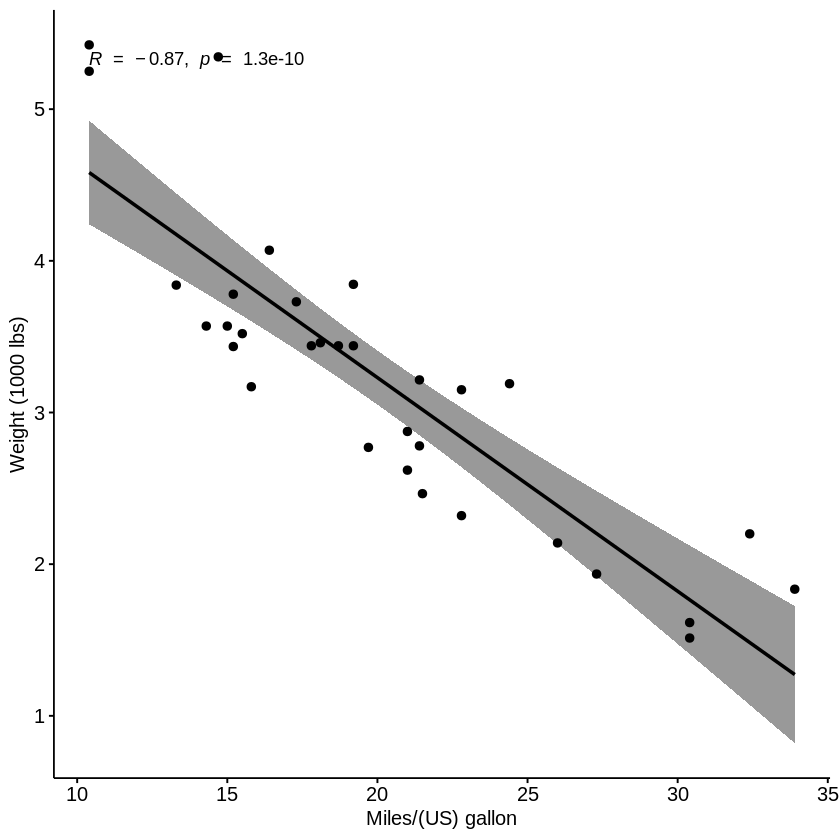

In [38]:
install.packages("ggpubr")
library("ggpubr")
ggscatter(my_data, x = "mpg", y = "wt", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Miles/(US) gallon", ylab = "Weight (1000 lbs)")

Preleminary test to check the test assumptions

1. Is the covariation linear? Yes, form the plot above, the relationship is linear. In the situation where the scatter plots show curved patterns, we are dealing with nonlinear association between the two variables.

2. Are the data from each of the 2 variables (x, y) follow a normal distribution?
Use Shapiro-Wilk normality test –> R function: shapiro.test()
and look at the normality plot —> R function: ggpubr::ggqqplot()
3. Shapiro-Wilk test can be performed as follow:
Null hypothesis: the data are normally distributed
Alternative hypothesis: the data are not normally distributed

In [39]:
# Shapiro-Wilk normality test for mpg
shapiro.test(my_data$mpg) # => p = 0.1229
# Shapiro-Wilk normality test for wt
shapiro.test(my_data$wt) # => p = 0.09


	Shapiro-Wilk normality test

data:  my_data$mpg
W = 0.94756, p-value = 0.1229



	Shapiro-Wilk normality test

data:  my_data$wt
W = 0.94326, p-value = 0.09265


Visual inspection of the data normality using Q-Q plots (quantile-quantile plots). Q-Q plot draws the correlation between a given sample and the normal distribution.

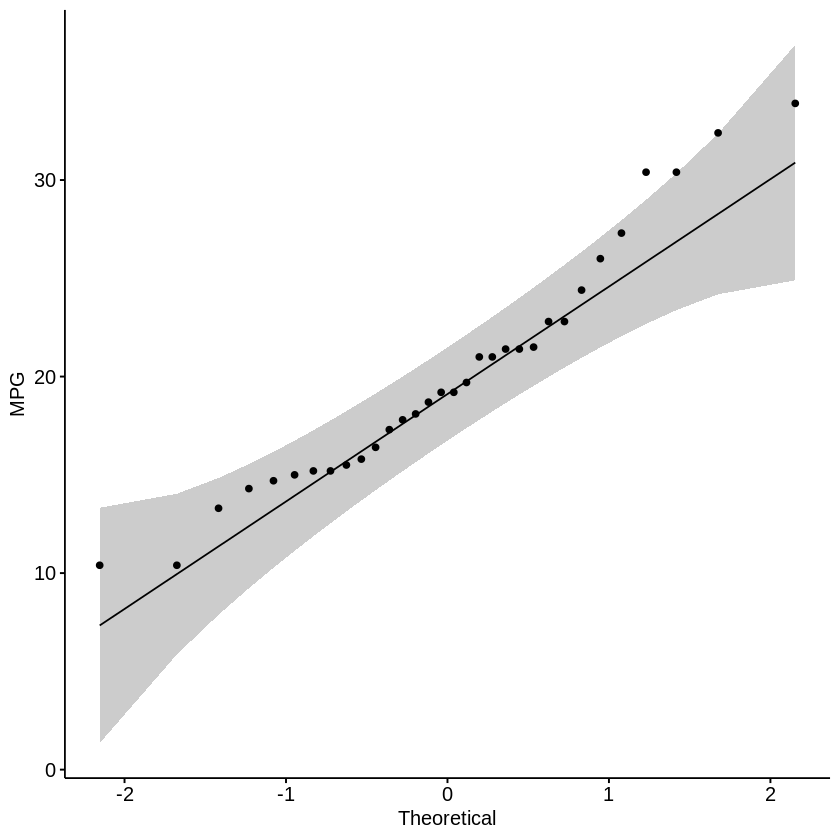

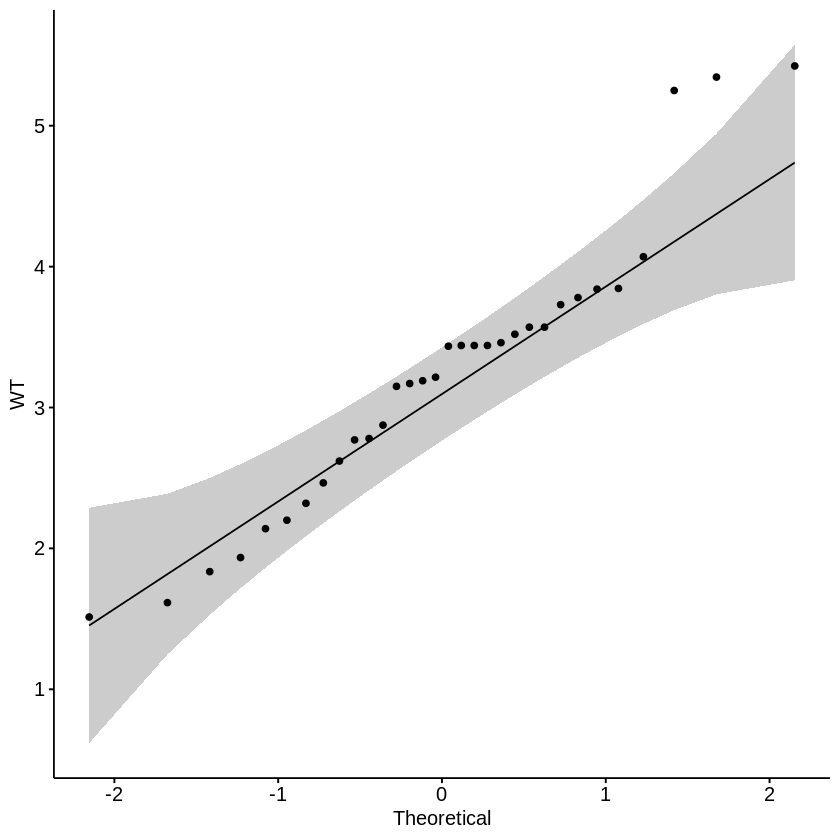

In [40]:
library("ggpubr")
# mpg
ggqqplot(my_data$mpg, ylab = "MPG")
# wt
ggqqplot(my_data$wt, ylab = "WT")

**Pearson correlation test**

Correlation test between mpg and wt variables:

In [41]:
res <- cor.test(my_data$wt, my_data$mpg, 
                    method = "pearson")
res


	Pearson's product-moment correlation

data:  my_data$wt and my_data$mpg
t = -9.559, df = 30, p-value = 1.294e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9338264 -0.7440872
sample estimates:
       cor 
-0.8676594 


In the result above :

* t is the t-test statistic value (t = -9.559),
* df is the degrees of freedom (df= 30),
* p-value is the significance level of the t-test (p-value = 1.29410^{-10}).
* conf.int is the confidence interval of the correlation coefficient at 95% (conf.int = [-0.9338, -0.7441]);
* sample estimates is the correlation coefficient (Cor.coeff = -0.87).

The p-value of the test is 1.29410^{-10}, which is less than the significance level alpha = 0.05. We can conclude that wt and mpg are significantly correlated with a correlation coefficient of -0.87 and p-value of 1.29410^{-10} .

**Kendall rank correlation test**

The Kendall rank correlation coefficient or Kendall’s tau statistic is used to estimate a rank-based measure of association. This test may be used if the data do not necessarily come from a bivariate normal distribution.

In [42]:
res2 <- cor.test(my_data$wt, my_data$mpg,  method="kendall")
res2

Warning message in cor.test.default(my_data$wt, my_data$mpg, method = "kendall"):
“Cannot compute exact p-value with ties”



	Kendall's rank correlation tau

data:  my_data$wt and my_data$mpg
z = -5.7981, p-value = 6.706e-09
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.7278321 


**Spearman rank correlation coefficient**

Spearman’s rho statistic is also used to estimate a rank-based measure of association. This test may be used if the data do not come from a bivariate normal distribution.

In [43]:
res2 <-cor.test(my_data$wt, my_data$mpg,  method = "spearman")
res2

Warning message in cor.test.default(my_data$wt, my_data$mpg, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  my_data$wt and my_data$mpg
S = 10292, p-value = 1.488e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.886422 
